In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [104]:
sns.set_palette('viridis')
sns.set_style('whitegrid')

In [105]:
df=pd.read_csv('titanic.csv')

In [106]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
def by_group (df,group):
    groupd=df.groupby(group).agg({'PassengerId':'count','Survived':'sum'}).rename(columns={'PassengerId':'NumPassengers'})
    groupd['Rate']=groupd['Survived']/groupd['NumPassengers']
    return groupd

dff=df.copy()

In [108]:
grpby_sex=by_group(df,['Sex'])
grpby_sex

,NumPassengers,Survived,Rate
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


[]

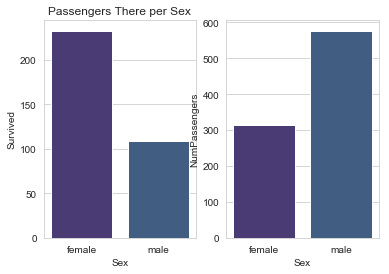

In [109]:
f,(ax1,ax2)=plt.subplots(1,2)

sns.barplot(x=grpby_sex.index,y='Survived',data=grpby_sex,ax=ax1)
sns.barplot(x=grpby_sex.index,y='NumPassengers',data=grpby_sex,ax=ax2)
ax1.set_title('Passengers survived per Sex')
ax1.set_title('Passengers There per Sex')
ax1.plot()
ax2.plot()


In [110]:
grpby_class=by_group(df,['Pclass'])
grpby_class

,NumPassengers,Survived,Rate
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


[]

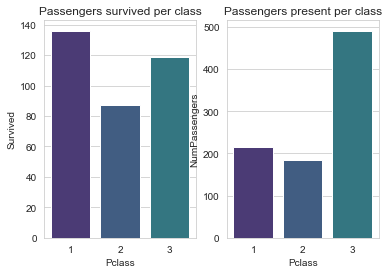

In [111]:
f,(ax1,ax2)=plt.subplots(1,2)
sns.barplot(x=grpby_class.index,y='Survived',data=grpby_class,ax=ax1)
sns.barplot(x=grpby_class.index,y='NumPassengers',data=grpby_class,ax=ax2)
ax1.set_title('Passengers survived per class')
ax2.set_title('Passengers present per class')
ax1.plot()
ax2.plot()

In [112]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [113]:
df['Embarked']=df['Embarked'].fillna(value='S')

In [114]:
df['Embarked'].isnull().sum()

0

In [115]:
df['Age'].isnull().sum()

177

In [116]:
med_age=df.groupby(['Pclass'])['Age'].median()
med_age

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [117]:
def fill_age_nan(df):
    return df[['Age','Pclass']].apply(lambda x:med_age.get(x['Pclass']) if(pd.isnull(x['Age'])) else x['Age'],axis=1)
    
df['Age']=fill_age_nan(df)
    

In [118]:
def ageclass_by_age (age):
    if age<10:
        return '<10'
    elif(age>=10 and age<20):
        return '>=10 & <20'
    elif(age>=20 and age<35):
        return '>=20 & <35'
    elif(age>=35 and age<50):
        return '>=35 & <50'
    elif(age>=50 and age<65):
        return '>=50 & <65'
    else:
        return '>65'

    
def convert(df):
    return df['Age'].apply(ageclass_by_age)
    
df['Age']=convert(df)
    
    

In [119]:
grpby_age=by_group(df,['Age'])
grpby_age

,NumPassengers,Survived,Rate
Age,,,
<10,62,38,0.612903
>65,11,1,0.090909
>=10 & <20,102,41,0.401961
>=20 & <35,462,155,0.335498
>=35 & <50,191,81,0.424084
>=50 & <65,63,26,0.412698


In [120]:
def conv_family_size(df):
    fam_memb=df['Parch']+df['SibSp']
    if(fam_memb==0):
        return 'NO FAMILY'
    if(fam_memb<=3 and fam_memb>=0):
        return 'SMALL Family'
    else:
        return 'BIG Family'
    
df['Family']=df.apply(conv_family_size,axis=1)

In [121]:
grpby_family=by_group(df,['Family'])
grpby_family

,NumPassengers,Survived,Rate
Family,,,
BIG Family,62,10,0.161290
NO FAMILY,537,163,0.303538
SMALL Family,292,169,0.578767


In [122]:
df=df.drop('Cabin',axis=1)

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [124]:
cat_att=['Pclass','Age','Sex','Embarked','Name','SibSp','Parch']
num_att=['Fare']

In [125]:
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('std_scaler',StandardScaler())])

In [126]:
cat_pipeline=Pipeline([('cat_encoder',OneHotEncoder())])

In [127]:
full_pipeline=ColumnTransformer([('num',num_pipeline,num_att),('cat',cat_pipeline,cat_att)])

In [128]:
X=df[['Fare','Sex','Pclass','Age','SibSp','Parch','Embarked','Name']]
y=df['Survived']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
from sklearn.model_selection import cross_val_score